<a href="https://colab.research.google.com/github/Sabrinapearlpervez/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import pandas as pd
import numpy as np

In [366]:
sales_predictions = '/content/sales_predictions (2).csv'

In [367]:
df = pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [368]:
df.shape
#number of rows and columns

(8523, 12)

In [369]:
df.dtypes
#datatypes of each variable

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [370]:
df.duplicated()
#checking for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [371]:
df= df.drop_duplicates()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [372]:
df.isna().sum()
#Identified the missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [373]:
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])
df
#Dropped both Item Weight and the Outlet Size columns, too many missing values.

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [374]:
df.isna().sum()
#making sure there are no more missing values

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [375]:
df['Item_Visibility'].min()

0.0

In [376]:
df['Item_Visibility'].max()

0.328390948

In [377]:
df['Item_Visibility'].mean()
#all the codes above are the min,max, mean for Item Visibility

0.06613202877895127

In [378]:
df['Item_MRP'].min()

31.29

In [379]:
df['Item_MRP'].max()

266.8884

In [380]:
df['Item_MRP'].mean()
#all the codes above are the min,max, mean for Item MRP

140.9927819781768

In [381]:
df['Outlet_Establishment_Year'].min()

1985

In [382]:
df['Outlet_Establishment_Year'].max()

2009

In [383]:
df['Outlet_Establishment_Year'].mean()
#all the codes above are the min,max, mean for Outlet Establishment Year

1997.8318667135984

In [384]:
df['Item_Outlet_Sales'].min()

33.29

In [385]:
df['Item_Outlet_Sales'].max()

13086.9648

In [386]:
df['Item_Outlet_Sales'].mean()
#all the codes above are the min,max, mean for Item Outlet Sales

2181.2889135750365

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

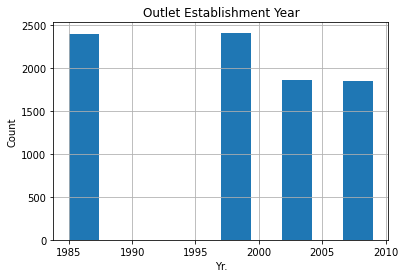

In [388]:
df['Outlet_Establishment_Year'].hist();
plt.title('Outlet Establishment Year');
plt.xlabel('Yr.');
plt.ylabel('Count');

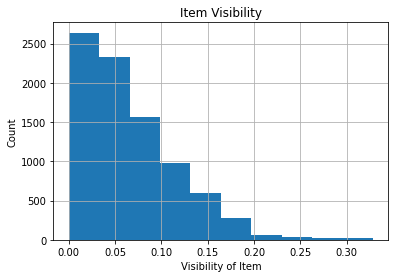

In [389]:
df['Item_Visibility'].hist();
plt.title('Item Visibility');
plt.xlabel('Visibility of Item');
plt.ylabel('Count');

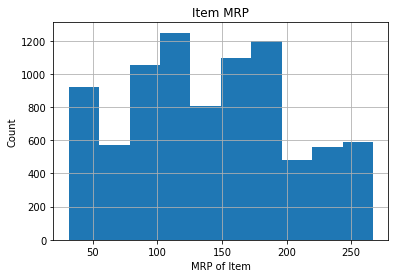

In [390]:
df['Item_MRP'].hist();
plt.title('Item MRP');
plt.xlabel('MRP of Item');
plt.ylabel('Count');

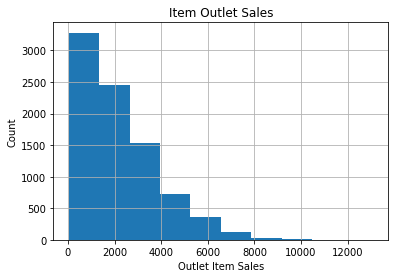

In [391]:
df['Item_Outlet_Sales'].hist();
plt.title('Item Outlet Sales');
plt.xlabel('Outlet Item Sales');
plt.ylabel('Count');

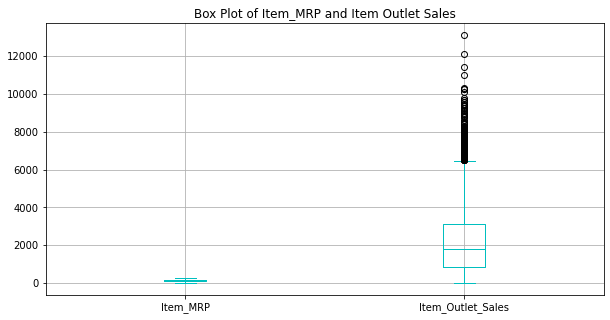

In [392]:
from IPython.core.pylabtools import figsize

plt.figure(figsize=(10,5));
df.boxplot(['Item_MRP', 'Item_Outlet_Sales'],
           color = 'c');
plt.title('Box Plot of Item_MRP and Item Outlet Sales')
patch_artist=True


In [394]:
corr = df.corr()
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


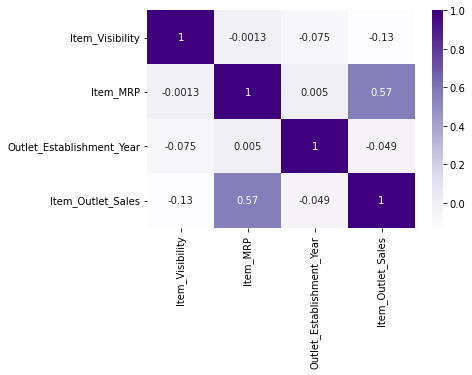

In [401]:
sns.heatmap(corr, cmap = 'Purples', annot =True);